In [105]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loaded required libraries

In [3]:
auto = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 3/Automobile_insurance_fraud.csv')
auto

#imported dataset.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that the columns except in dataset are of object datatype, integer and float datatypes

In [5]:
print(auto.isnull().values.any())
auto.isnull().sum()

True


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values in dataset

In [106]:
auto.drop(['_c39'],axis=1,inplace=True)

#It contains unique values, so dropped _c39

KeyError: "['_c39'] not found in axis"

In [11]:
auto['policy_number'].value_counts()

116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

In [10]:
auto['policy_bind_date'].value_counts()

05-08-1992    3
01-01-2006    3
28-04-1992    3
21-12-2002    2
04-05-2000    2
             ..
03-08-2009    1
09-03-1999    1
03-11-1996    1
19-06-1996    1
08-05-2005    1
Name: policy_bind_date, Length: 951, dtype: int64

In [15]:
auto.drop(['policy_number'],axis=1,inplace=True)
auto.drop(['policy_bind_date'],axis=1,inplace=True)

both columns has almost all unique values, so dropped both the columns

<AxesSubplot:xlabel='policy_state', ylabel='count'>

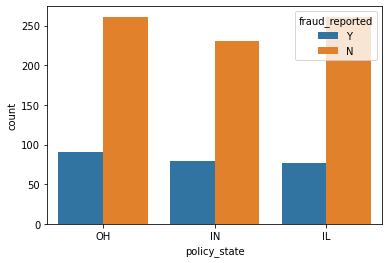

In [18]:
sns.countplot(x='policy_state',hue='fraud_reported',data=auto)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

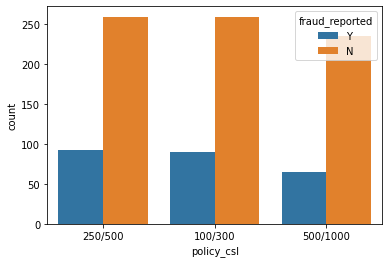

In [19]:
sns.countplot(x='policy_csl',hue='fraud_reported',data=auto)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

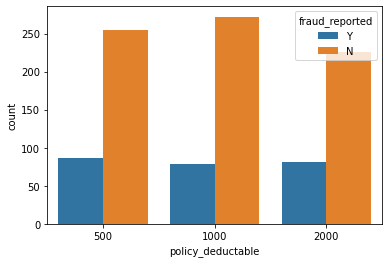

In [20]:
sns.countplot(x='policy_deductable',hue='fraud_reported',data=auto)

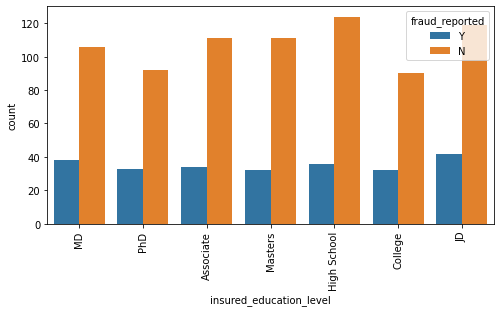

In [28]:
plt.figure(figsize=[8,4])
sns.countplot(x='insured_education_level',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

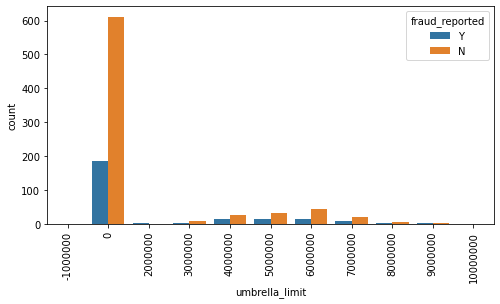

In [29]:
plt.figure(figsize=[8,4])
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

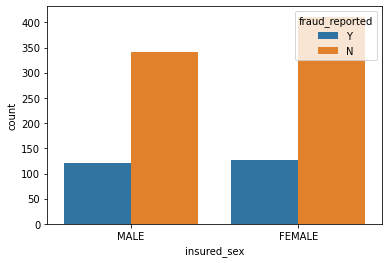

In [24]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=auto)

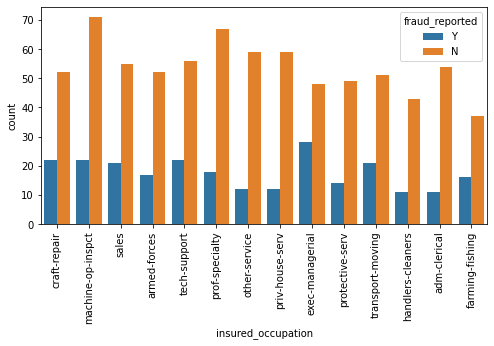

In [31]:
plt.figure(figsize=[8,4])
sns.countplot(x='insured_occupation',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

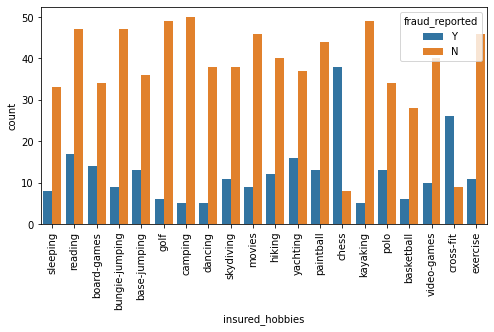

In [32]:
plt.figure(figsize=[8,4])
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

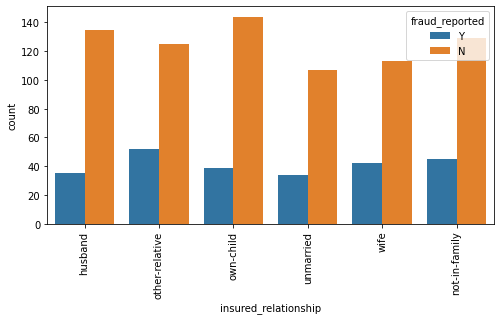

In [33]:
plt.figure(figsize=[8,4])
sns.countplot(x='insured_relationship',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0      

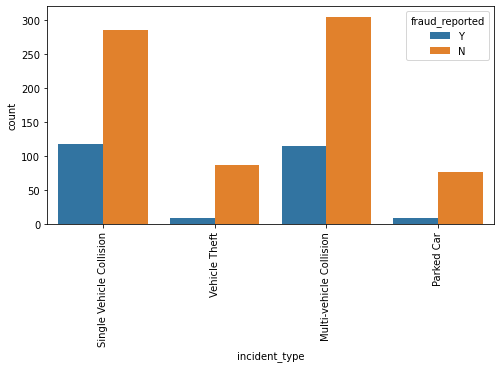

In [37]:
plt.figure(figsize=[8,4])
sns.countplot(x='incident_type',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

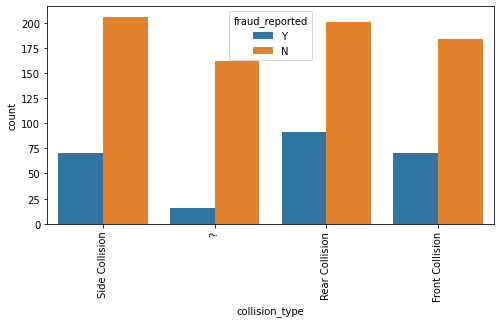

In [38]:
plt.figure(figsize=[8,4])
sns.countplot(x='collision_type',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

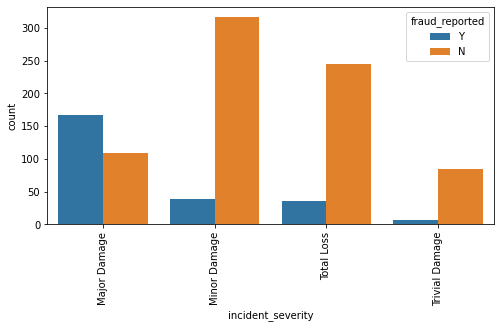

In [39]:
plt.figure(figsize=[8,4])
sns.countplot(x='incident_severity',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

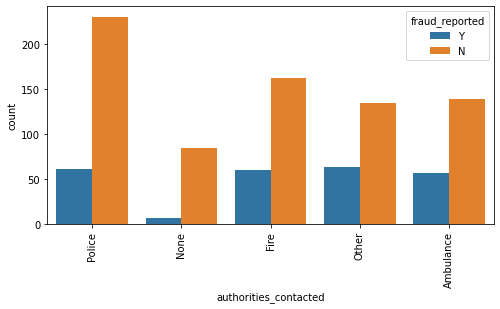

In [40]:
plt.figure(figsize=[8,4])
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

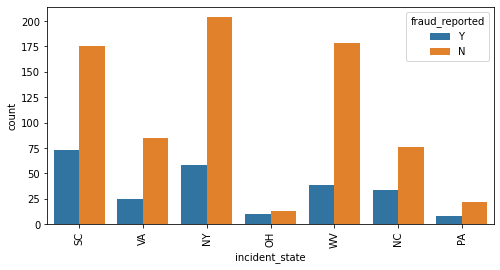

In [57]:
plt.figure(figsize=[8,4])
sns.countplot(x='incident_state',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

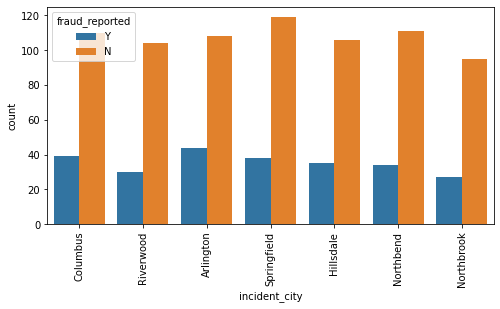

In [58]:
plt.figure(figsize=[8,4])
sns.countplot(x='incident_city',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

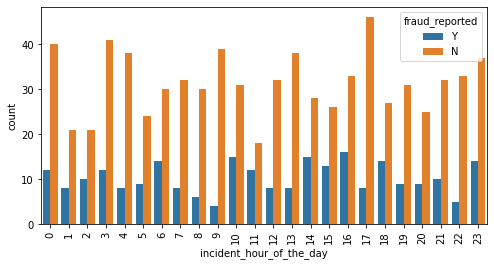

In [60]:
plt.figure(figsize=[8,4])
sns.countplot(x='incident_hour_of_the_day',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

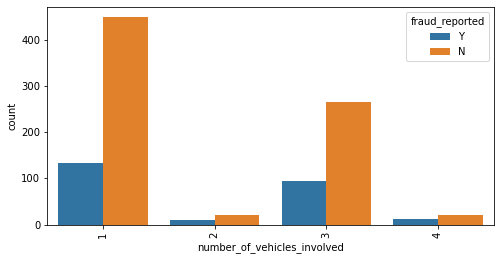

In [61]:
plt.figure(figsize=[8,4])
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

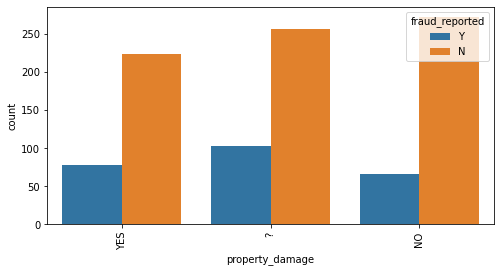

In [62]:
plt.figure(figsize=[8,4])
sns.countplot(x='property_damage',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

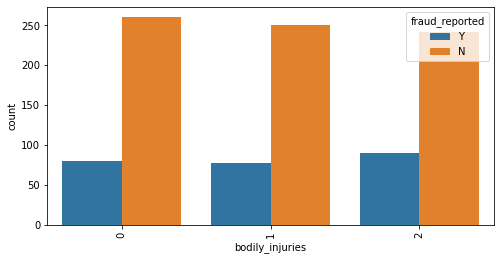

In [63]:
plt.figure(figsize=[8,4])
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

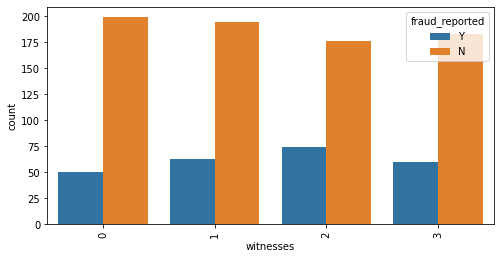

In [64]:
plt.figure(figsize=[8,4])
sns.countplot(x='witnesses',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

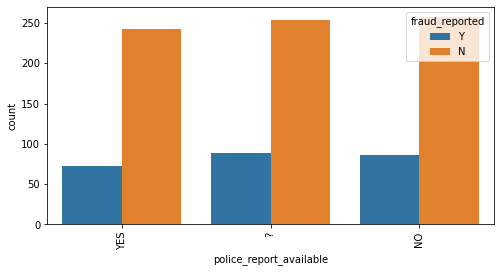

In [65]:
plt.figure(figsize=[8,4])
sns.countplot(x='police_report_available',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

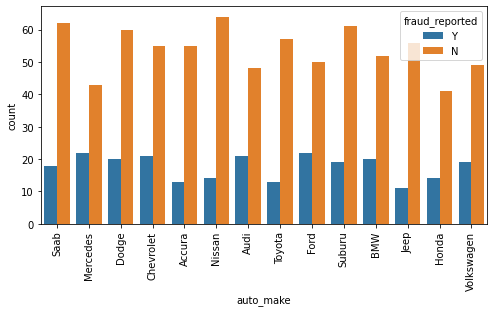

In [70]:
plt.figure(figsize=[8,4])
sns.countplot(x='auto_make',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

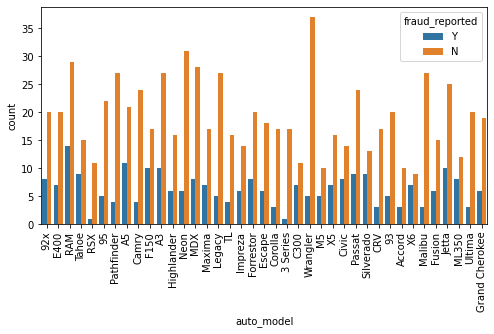

In [71]:
plt.figure(figsize=[8,4])
sns.countplot(x='auto_model',hue='fraud_reported',data=auto)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

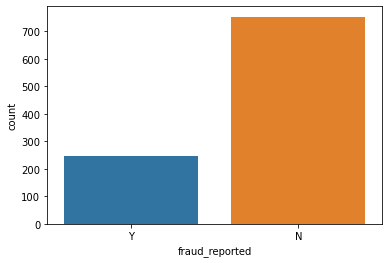

In [72]:
sns.countplot('fraud_reported',data=auto)

In [74]:
corr_mat = auto.corr()
corr_mat

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554


In [80]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
auto['policy_state'] = le.fit_transform(auto['policy_state'])
auto['policy_csl'] = le.fit_transform(auto['policy_csl'])
auto['insured_sex'] = le.fit_transform(auto['insured_sex'])
auto['insured_education_level'] = le.fit_transform(auto['insured_education_level'])
auto['insured_occupation'] = le.fit_transform(auto['insured_occupation'])
auto['insured_hobbies'] = le.fit_transform(auto['insured_hobbies'])
auto['insured_relationship'] = le.fit_transform(auto['insured_relationship'])
auto['incident_date'] = le.fit_transform(auto['incident_date'])
auto['incident_type'] = le.fit_transform(auto['incident_type'])
auto['collision_type'] = le.fit_transform(auto['collision_type'])
auto['incident_severity'] = le.fit_transform(auto['incident_severity'])
auto['authorities_contacted'] = le.fit_transform(auto['authorities_contacted'])
auto['incident_state'] = le.fit_transform(auto['incident_state'])
auto['incident_city'] = le.fit_transform(auto['incident_city'])
auto['incident_location'] = le.fit_transform(auto['incident_location'])
auto['property_damage'] = le.fit_transform(auto['property_damage'])
auto['police_report_available'] = le.fit_transform(auto['police_report_available'])
auto['auto_make'] = le.fit_transform(auto['auto_make'])
auto['auto_model'] = le.fit_transform(auto['auto_model'])
auto['fraud_reported'] = le.fit_transform(auto['fraud_reported'])



Converted all categorial columns to numerical using label encoder

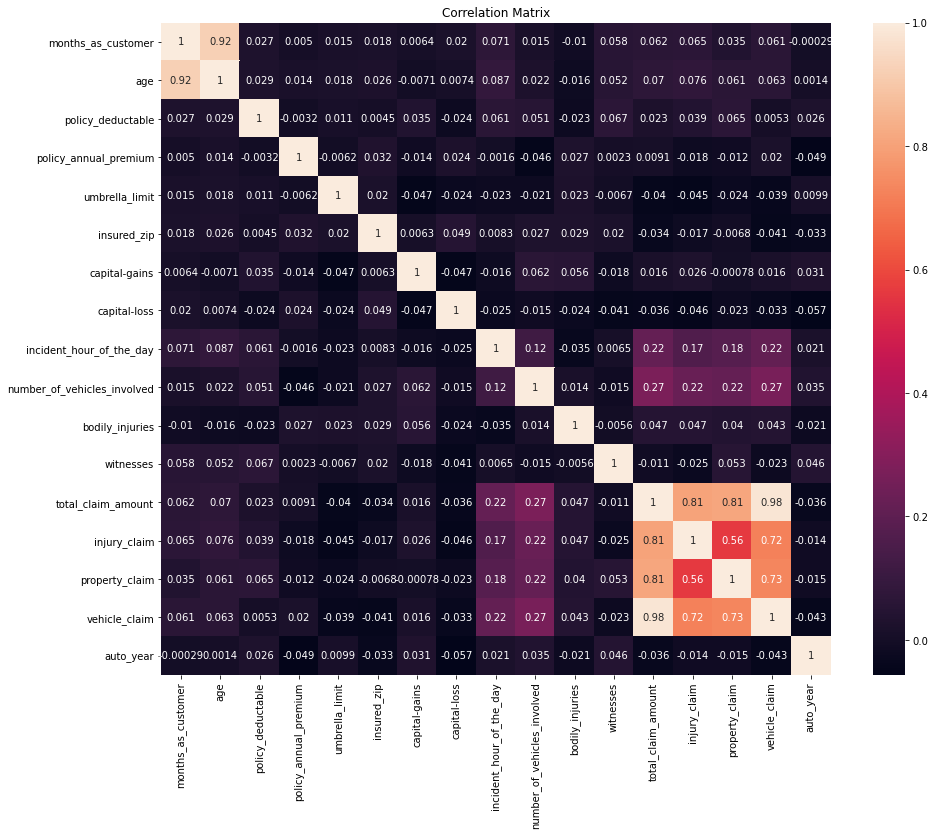

In [84]:
plt.figure(figsize=[15,12])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [85]:
corr_target = auto.corrwith(auto['fraud_reported'], axis=0)
corr_target

months_as_customer             0.020544
age                            0.012143
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_date                 -0.047726
incident_type                 -0.050376
collision_type                 0.110130
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839


incident_severity is having strong relation with the fraud_reported

In [87]:
x=auto.drop('fraud_reported',axis=1)
y=auto['fraud_reported']

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_accuracy)

[[189   2]
 [ 58   1]]
0.76


In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

In [92]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

print(gnb_conf_matrix)
print(gnb_accuracy_score)


[[157  34]
 [ 49  10]]
0.668


In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [94]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_accuracy_score)                                  

[[169  22]
 [ 24  35]]
0.816


In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

In [96]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_accuracy_score)

[[176  15]
 [ 40  19]]
0.78


In [99]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of LogisticRegression : ',scr.mean())

Cross validation score of LogisticRegression :  0.750006012072241


In [102]:
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Gaussian Naivebayes Classifier : ',scr.mean())

Cross validation score of Gaussian Naivebayes Classifier :  0.6681215881490031


In [103]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of DecisionTreeClassifier : ',scr.mean())

Cross validation score of DecisionTreeClassifier :  0.8010966019767692


In [104]:
scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of RandomForestClassifier : ',scr.mean())

Cross validation score of RandomForestClassifier :  0.7840223168121588


Random Forest Classifier is having least difference between cross validation score and accuracy score so we can choose Random Forest Classifier as best model.

In [107]:
import joblib
joblib.dump(rf,'Automobile_Insurance_Fraud.pkl')

['Automobile_Insurance_Fraud.pkl']